In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import HowToBreakIntoTheField as t
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==False]
non_bootcamp_df = df[df['TimeAfterBootcamp'].isnull()==True]
print(non_bootcamp_df.shape)
bootcamp_df.shape

(18220, 154)


(882, 154)

In [8]:
bootcamp_df['Gender'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['Gender'].isnull()))

Male                                  0.848980
Female                                0.137415
Other                                 0.005442
Gender non-conforming                 0.005442
Transgender; Gender non-conforming    0.001361
Transgender                           0.001361
Name: Gender, dtype: float64

In [10]:
non_bootcamp_df['Gender'].value_counts()/(non_bootcamp_df.shape[0] - sum(non_bootcamp_df['Gender'].isnull()))

Male                                                       0.906776
Female                                                     0.071376
Other                                                      0.005667
Gender non-conforming                                      0.004107
Male; Other                                                0.003450
Female; Transgender                                        0.002300
Transgender                                                0.001561
Male; Gender non-conforming                                0.001561
Female; Gender non-conforming                              0.000903
Male; Female                                               0.000411
Male; Transgender                                          0.000329
Male; Female; Transgender; Gender non-conforming; Other    0.000329
Transgender; Gender non-conforming                         0.000329
Female; Transgender; Gender non-conforming                 0.000246
Male; Female; Transgender                       

In [12]:
bootcamp_df['FormalEducation'].value_counts()/(bootcamp_df.shape[0] - sum(bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.485261
Master's degree                                                      0.239229
Some college/university study without earning a bachelor's degree    0.148526
Secondary school                                                     0.066893
Doctoral degree                                                      0.024943
I prefer not to answer                                               0.014739
Professional degree                                                  0.009070
I never completed any formal education                               0.005669
Primary/elementary school                                            0.005669
Name: FormalEducation, dtype: float64

In [11]:
non_bootcamp_df['FormalEducation'].value_counts()/(non_bootcamp_df.shape[0] - sum(non_bootcamp_df['FormalEducation'].isnull()))

Bachelor's degree                                                    0.421021
Master's degree                                                      0.215807
Some college/university study without earning a bachelor's degree    0.150274
Secondary school                                                     0.118990
Doctoral degree                                                      0.029034
Primary/elementary school                                            0.021899
I prefer not to answer                                               0.021734
Professional degree                                                  0.013557
I never completed any formal education                               0.007684
Name: FormalEducation, dtype: float64

In [13]:
bootcamp_df['TimeAfterBootcamp'].value_counts()/bootcamp_df.shape[0]

I already had a job as a developer when I started the program    0.479592
I got a job as a developer before completing the program         0.104308
One to three months                                              0.096372
Immediately upon graduating                                      0.095238
I haven't gotten a job as a developer yet                        0.072562
Less than a month                                                0.053288
Four to six months                                               0.035147
Six months to a year                                             0.032880
Longer than a year                                               0.030612
Name: TimeAfterBootcamp, dtype: float64

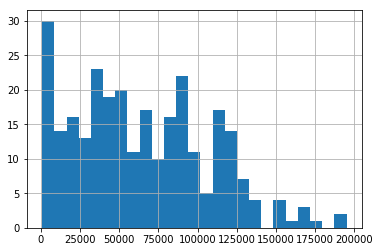

In [14]:
bootcamp_df['Salary'].hist(bins=25)